# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

0.23.1


In [3]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定S曲線資料點
X, color = datasets.make_blobs(n_samples, random_state=0)
red = color == 0 # 將 y 為 0 的 index set 存成變數 red
green = color == 1

In [8]:
color

array([0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1,
       2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2])

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

circles, perplexity=4 in 1.6 sec
circles, perplexity=6 in 1.5 sec
circles, perplexity=9 in 1.5 sec
circles, perplexity=14 in 1.6 sec
circles, perplexity=21 in 1.9 sec
circles, perplexity=30 in 2.2 sec
circles, perplexity=45 in 1.9 sec
circles, perplexity=66 in 1.7 sec
circles, perplexity=100 in 2.4 sec


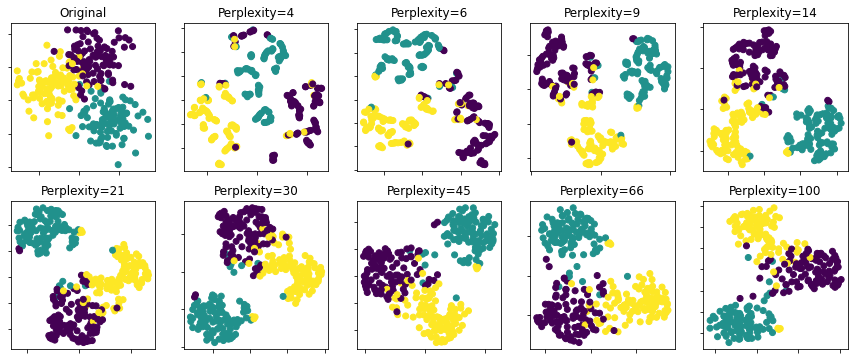

In [9]:
# 繪製不同 perplexity 下的 t-SNE 流形還原圖 (請注意! 語法也要對應調整)
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')